# 1. 주제선정 이유

회계원리 시간에 연결재무상태표와 포괄손익계산서를 계산하는 법을 배웠는데, 파이썬을 활용하여 회계를 모르는 사람도 사업보고서를 통해 수익성/위험도 분석을 할 수 있도록 여러 기업과 비교하여 적절한지 판단하는 프로그램을 만들 것이다. 활용 양식은 네이버 증권을 크롤링해서 사용한다.

# (1) 참고자료

이성원 교수님의 웹파이선 프로그래밍 수업자료를 활용하였고, 
크롤링은 블로그 정보인 https://seong6496.tistory.com/156 을 참고하였습니다.
정규분포표 신뢰구간은  https://jimmy-ai.tistory.com/356 을 참고하였습니다.

# 2. 본문

# (1) 재무정보 크롤링

다음은 기업의 재무정보를 크롤링한 것이다. 예시로는 기업 '유유제약'의 재무제표를 사용하였다.

In [9]:
import pandas as pd
import numpy as np
import requests
code = '000220'
url = f"https://finance.naver.com/item/main.naver?code={code}"
r = requests.get(url)
df = pd.read_html(r.text)[3]
df

주요재무정보 최근 연간 실적                              최근 분기 실적           \
       주요재무정보  2020.12  2021.12  2022.12 2023.12(E)  2022.06  2022.09   
       주요재무정보   IFRS연결   IFRS연결   IFRS연결     IFRS연결   IFRS연결   IFRS연결   
0         매출액   981.00  1157.00  1389.00        NaN   345.00   341.00   
1        영업이익    63.00    12.00    -6.00        NaN     1.00    -9.00   
2       당기순이익    24.00    -9.00   -44.00        NaN    -9.00   -17.00   
3       영업이익률     6.39     1.04    -0.43        NaN     0.31    -2.57   
4        순이익률     2.46    -0.80    -3.19        NaN    -2.58    -4.85   
5   ROE(지배주주)     1.26    -1.85    -4.97        NaN    -3.27    -4.51   
6        부채비율    32.35    49.97    58.22        NaN    53.24    54.50   
7        당좌비율   220.05   244.71    79.82        NaN   119.78   108.31   
8         유보율   982.34   471.96   446.49        NaN   453.34   442.94   
9      EPS(원)    82.00  -116.00  -302.00        NaN   -71.00  -105.00   
10     PER(배)    92.32   -67.57   -20.59        NaN   -30.03   -20.41   
11     BPS(원)  6532.00  6458.00  6167.00        NaN  6262.00  6154.00   
12     PBR(배)     1.16     1.21     1.01        NaN     0.98     0.92   
13   주당배당금(원)   109.00   105.00   105.00        NaN      NaN      NaN   
14   시가배당률(%)     1.44     1.34     1.69        NaN      NaN      NaN   
15    배당성향(%)   144.23   -91.87   -33.43        NaN      NaN      NaN   

                                          
    2022.12  2023.03  2023.06 2023.09(E)  
     IFRS연결   IFRS연결   IFRS연결     IFRS연결  
0    347.00   343.00   342.00        NaN  
1     -4.00    20.00    -4.00        NaN  
2    -18.00     5.00   -32.00        NaN  
3     -1.13     5.75    -1.11        NaN  
4     -5.20     1.34    -9.28        NaN  
5     -4.97    -4.75    -6.48        NaN  
6     58.22    62.81    62.97        NaN  
7     79.82    73.62   100.74        NaN  
8    446.49   435.62   445.74        NaN  
9   -111.00     5.00  -174.00        NaN  
10   -20.59   -20.96   -13.05        NaN  
11  6167.00  6009.00  6118.00        NaN  
12     1.01     0.99     0.82        NaN  
13      NaN      NaN      NaN        NaN  
14      NaN      NaN      NaN        NaN  
15      NaN      NaN      NaN        NaN

이 재무제표에서 부채비율, 자기자본이익률(ROE)를 여러 기업과 비교를 해볼 것이다. 

# (2) 부채비율 시각화, 비교

부채비율은 자기자본 대비 타인자본의 비중을 평가하는 대표적인 비율로서 재무제표분석에서 가장 중시되는 지표 중에 하나이다.
출처 <KIFRS 회계원리 - 정혜영, 황문호, 이준일, 최승욱>
그렇기 때문에 재무제표 분석에도 매우 중요하기에 다른 기업과 비교하여 그래프로 시각화할 것이다.

[53.24 54.5  58.22 62.81 62.97]


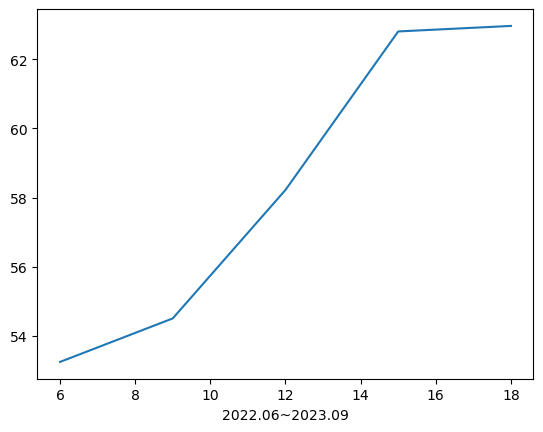

In [10]:
import matplotlib.pyplot as plt
import matplotlib
ratioDebt = df[6:7]
ratioDebtMatrix = df.iloc[6, 1:].values
xYear = [6,9,12,15,18]
for item in range(4) :
    ratioDebtMatrix = np.delete(ratioDebtMatrix, 0, axis=0)
ratioDebtMatrix = np.delete(ratioDebtMatrix, -1, axis=0)
print(ratioDebtMatrix)

plt.xlabel('2022.06~2023.09')

plt.plot(xYear, ratioDebtMatrix)

다른 회사와 비교하기 위해 class 함수로 전환하고, 값을 정의해준다.

In [11]:
class getRatio :
    def __init__ (self, code) :
        self.code = code
        self.url = f"https://finance.naver.com/item/main.naver?code={self.code}"
        self.r = requests.get(self.url)
        self.df = pd.read_html(self.r.text)[3]
        self.ratioDebt = self.df[6:7]
        self.ratioDebtMatrix = self.df.iloc[6, 1:].values
        for item in range(4) :
            self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, 0, axis=0)
        self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, -1, axis=0)
#분석하고자 하는 대상, (ex.유유제약)
main = getRatio('000220')
print(main.ratioDebtMatrix)
#삼일제약 분석
sampleData1 = getRatio('000520')
#삼성제약 분석
sampleData2 = getRatio('001360')
#동성제약 분석
sampleData3 = getRatio('002210')
#국제약품 분석
sampleData4 = getRatio('002720')
#대원제약 분석
sampleData5 = getRatio('003220')
#삼진제약 분석
sampleData6 = getRatio('005500')
#광동제약 분석
sampleData7 = getRatio('009290')
#환인제약 분석
sampleData8 = getRatio('016580')



[53.24 54.5  58.22 62.81 62.97]


다른 회사와 비교한 main회사의 부채비율 위치를 확인할 수 있다.

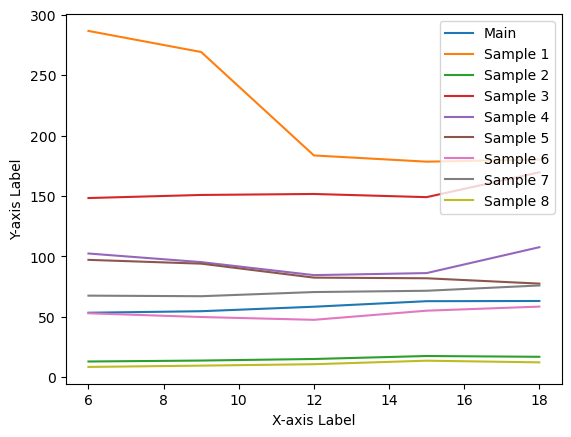

In [12]:
import matplotlib.pyplot as plt

def plot_ratio_data(data, label):
    xYear = [6, 9, 12, 15, 18]  
    plt.plot(xYear, data.ratioDebtMatrix, label=label)

plot_ratio_data(main, 'Main')

plot_ratio_data(sampleData1, 'Sample 1')
plot_ratio_data(sampleData2, 'Sample 2')
plot_ratio_data(sampleData3, 'Sample 3')
plot_ratio_data(sampleData4, 'Sample 4')
plot_ratio_data(sampleData5, 'Sample 5')
plot_ratio_data(sampleData6, 'Sample 6')
plot_ratio_data(sampleData7, 'Sample 7')
plot_ratio_data(sampleData8, 'Sample 8')

plt.xlabel('X-axis Label')  
plt.ylabel('Y-axis Label')  
plt.legend()


plt.show()

비교하고자 했던 '유유제약'은 다른 제약회사들에 비해 부채비율이 낮은 편임을 알 수 있다.

# (3) ROE(순자본비율) 비교, 시각화

ROE(순자본이익률)은 당기순이익을 자기자본으로 나누어 계산한다. 당기순이익은 회계기간 동안 경영성과를 나타내는 측정치이자 기업의 소유주에게 직접적으로 귀속되는 이익이다. ROE는 기업의 주주 입장에서 투입한 자본(자기자본)의 이익창출능력을 평가하는 지표가 된다. - 출처 <KIFRS 회계원리 - 정혜영, 황문호, 이준일, 최승욱>

이에 따라 ROE는 투자를 판단하는데 중요한 지표이기에 ROE를 다른 기업과 비교하는 그래프를 만들었다.

In [13]:
class getRatio :
    def __init__ (self, code) :
        self.code = code
        self.url = f"https://finance.naver.com/item/main.naver?code={self.code}"
        self.r = requests.get(self.url)
        self.df = pd.read_html(self.r.text)[3]
        self.ratioDebt = self.df[6:7]
        self.ratioDebtMatrix = self.df.iloc[6, 1:].values
        for item in range(4) :
            self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, 0, axis=0)
        self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, -1, axis=0)
        self.valueROE = self.df[5:6]
        self.valueROEMatrix = self.df.iloc[5, 1:].values
        for item in range(4) :
            self.valueROEMatrix = np.delete(self.valueROEMatrix, 0, axis=0)
        self.valueROEMatrix = np.delete(self.valueROEMatrix, -1, axis=0)
#분석하고자 하는 대상, (ex.유유제약)
main = getRatio('000220')
print(main.valueROEMatrix)
#삼일제약 분석
sampleData1 = getRatio('000520')
#삼성제약 분석
sampleData2 = getRatio('001360')
#동성제약 분석
sampleData3 = getRatio('002210')
#국제약품 분석
sampleData4 = getRatio('002720')
#대원제약 분석
sampleData5 = getRatio('003220')
#삼진제약 분석
sampleData6 = getRatio('005500')
print(sampleData6.valueROEMatrix)
#광동제약 분석
sampleData7 = getRatio('009290')
#환인제약 분석
sampleData8 = getRatio('016580')

[-3.27 -4.51 -4.97 -4.75 -6.48]
[ 9.41  3.9    nan 10.5   9.18]


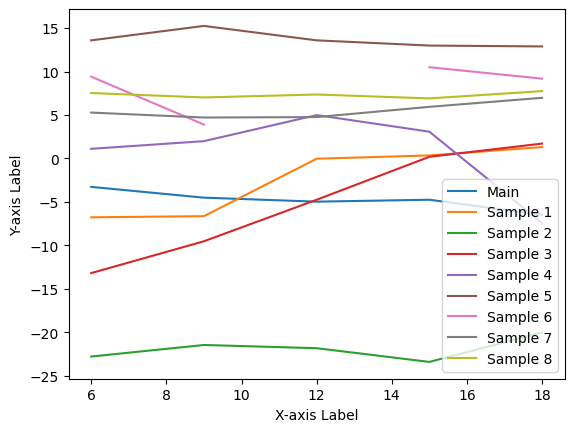

In [16]:
import matplotlib.pyplot as plt

def plot_ratio_data(data, label):
    xYear = [6, 9, 12, 15, 18]  
    plt.plot(xYear, data.valueROEMatrix, label=label)

plot_ratio_data(main, 'Main')

plot_ratio_data(sampleData1, 'Sample 1')
plot_ratio_data(sampleData2, 'Sample 2')
plot_ratio_data(sampleData3, 'Sample 3')
plot_ratio_data(sampleData4, 'Sample 4')
plot_ratio_data(sampleData5, 'Sample 5')
plot_ratio_data(sampleData6, 'Sample 6')
plot_ratio_data(sampleData7, 'Sample 7')
plot_ratio_data(sampleData8, 'Sample 8')

plt.xlabel('X-axis Label')  
plt.ylabel('Y-axis Label')  
plt.legend()
plt.show()

'유유제약'의 순자본비율은 main그래프의 색깔처럼 다른 제약회사에 비해 평균적임을 알 수 있다.

하지만, 그래프를 보면 Sample6의 그래프가 끊겨있는 것을 확인할 수 있다. 다른 기업과 비교하기 깔끔하지 않으니 사이킷런을 사용하여 중간에 Missing data를 평균값으로 채워 그래프를 완성할 것이다.

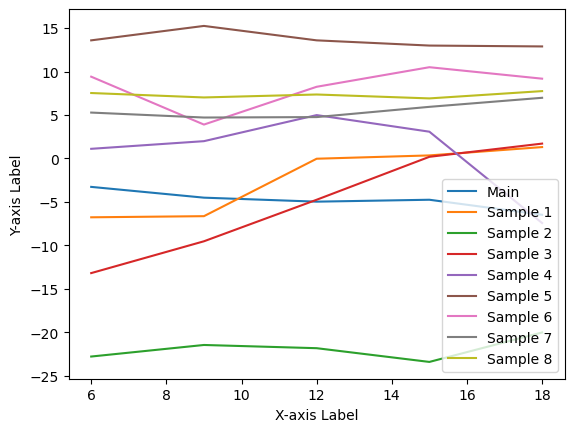

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sampleData6.valueROEMatrix = imputer.fit_transform(sampleData6.valueROEMatrix.reshape(-1, 1))
def plot_ratio_data(data, label):
    xYear = [6, 9, 12, 15, 18]  
    plt.plot(xYear, data.valueROEMatrix, label=label)

plot_ratio_data(main, 'Main')

plot_ratio_data(sampleData1, 'Sample 1')
plot_ratio_data(sampleData2, 'Sample 2')
plot_ratio_data(sampleData3, 'Sample 3')
plot_ratio_data(sampleData4, 'Sample 4')
plot_ratio_data(sampleData5, 'Sample 5')
plot_ratio_data(sampleData6, 'Sample 6')
plot_ratio_data(sampleData7, 'Sample 7')
plot_ratio_data(sampleData8, 'Sample 8')

plt.xlabel('X-axis Label')  
plt.ylabel('Y-axis Label')  
plt.legend()
plt.show()

# (4) 부채비율, 순자본비율 Z-scoring

꺾은선 그래프로 비교하기엔 분석하고자 하는 기업의 위치를 정확히 알 수 없다. 하지만, 정규분포표로 나타내면 다른 기업과 비교하여 기업이 어디 위치에 속하는지 판단할 수 있다. 가장 최근에 있는 값을 기준으로 정규분포표 숫자로 변환할 것이다.

In [53]:
debtColumn = []
ROEColumn = []
class getRatio :
    def __init__ (self, code) :
        self.code = code
        self.url = f"https://finance.naver.com/item/main.naver?code={self.code}"
        self.r = requests.get(self.url)
        self.df = pd.read_html(self.r.text)[3]
        self.ratioDebt = self.df[6:7]
        self.ratioDebtMatrix = self.df.iloc[6, 1:].values
        for item in range(4) :
            self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, 0, axis=0)
        self.ratioDebtMatrix = np.delete(self.ratioDebtMatrix, -1, axis=0)
        self.valueROE = self.df[5:6]
        self.valueROEMatrix = self.df.iloc[5, 1:].values
        for item in range(4) :
            self.valueROEMatrix = np.delete(self.valueROEMatrix, 0, axis=0)
        self.valueROEMatrix = np.delete(self.valueROEMatrix, -1, axis=0)
    def makeDebtZscore(self) :
        self.debt = self.ratioDebtMatrix[-1]
        debtColumn.append(self.debt)
    def makeROEZscore(self) :
        self.ROE = self.valueROEMatrix[-1]
        ROEColumn.append(self.ROE)
        
        #정규분포에 필요한 부채비율, 순자본비율로 열 만들기
    


#분석하고자 하는 대상, (ex.유유제약)
main = getRatio('000220')
main.makeDebtZscore()
main.makeROEZscore()
#삼일제약 분석
sampleData1 = getRatio('000520')
sampleData1.makeDebtZscore()
sampleData1.makeROEZscore()
#삼성제약 분석
sampleData2 = getRatio('001360')
sampleData2.makeDebtZscore()
sampleData2.makeROEZscore()
#동성제약 분석
sampleData3 = getRatio('002210')
sampleData3.makeDebtZscore()
sampleData3.makeROEZscore()
#국제약품 분석
sampleData4 = getRatio('002720')
sampleData4.makeDebtZscore()
sampleData4.makeROEZscore()
#대원제약 분석
sampleData5 = getRatio('003220')
sampleData5.makeDebtZscore()
sampleData5.makeROEZscore()
#삼진제약 분석
sampleData6 = getRatio('005500')
sampleData6.makeDebtZscore()
sampleData6.makeROEZscore()
#광동제약 분석
sampleData7 = getRatio('009290')
sampleData7.makeDebtZscore()
sampleData7.makeROEZscore()
#환인제약 분석
sampleData8 = getRatio('016580')
sampleData8.makeDebtZscore()
sampleData8.makeROEZscore()

print(debtColumn)
debtDataFrame = pd.DataFrame({'Debt' : debtColumn})
mu = debtDataFrame.mean(axis=0)
sigma = debtDataFrame.std(axis=0)

print(mu)
print(sigma)
debtZscore = (debtDataFrame - mu) / sigma
debtZscoreMatrix = debtZscore.values

print(debtZscore)

ROEDataFrame = pd.DataFrame({'ROE' : ROEColumn})
mu2 = ROEDataFrame.mean(axis=0)
sigma2 = ROEDataFrame.std(axis=0)
print(mu2)
print(sigma)
ROEZscore = (ROEDataFrame - mu2) / sigma2
print(ROEZscore)

[62.97, 180.07, 16.76, 169.54, 107.52, 77.36, 58.32, 75.83, 12.15]
Debt    84.502222
dtype: float64
Debt    59.154098
dtype: float64
       Debt
0 -0.364002
1  1.615573
2 -1.145182
3  1.437564
4  0.389116
5 -0.120739
6 -0.442610
7 -0.146604
8 -1.223114
ROE    0.654444
dtype: float64
Debt    59.154098
dtype: float64
        ROE
0 -0.688913
1  0.063301
2 -1.996356
3  0.101926
4 -0.780646
5  1.181484
6  0.823241
7  0.610805
8  0.685158


값을 성공적으로 구하였고, 이 값은 평균에서부터 얼마나 떨어져있는지 비교할 수 있는 값이다.
이제 신뢰구간과 비교하는 작업이 남았다. 신뢰구간은 95%와 99%가 있다. 이를 통해 부채비율이나 순자본비율이 비정상적인 값인지 확인해볼 수 있다.

In [58]:
import scipy.stats as st
import numpy as np
#자유도
lib = len(debtColumn) - 1 
#오차값
se = st.sem(debtColumn) 
mu = np.mean(debtColumn)

# 95% 신뢰구간
print(st.t.interval(0.95, lib, mu, se))
minDebt95 = st.t.interval(0.95, lib, mu, se)[0]
maxDebt95 = st.t.interval(0.95, lib, mu, se)[1]
# 99% 신뢰구간
print(st.t.interval(0.99, lib, mu, se))
minDebt99 = st.t.interval(0.99, lib, mu, se)[0]
maxDebt99 = st.t.interval(0.99, lib, mu, se)[1]
    
if main.debt >= minDebt95 :
    if main.debt <= maxDebt95 :
        print("부채비율이 95% 신뢰구간에 속합니다.")
    else :
        print("부채비율이 95% 신뢰구간에 속하지 않습니다.")
else :
    print("부채비율이 95% 신뢰구간에 속하지 않습니다.")
    
if main.debt >= minDebt99 :
    if main.debt <= maxDebt99 :
        print("부채비율이 99% 신뢰구간에 속합니다.")
    else :
        print("부채비율이 99% 신뢰구간에 속하지 않습니다.")
else :
    print("부채비율이 99% 신뢰구간에 속하지 않습니다.")

(39.03235713563238, 129.97208730881204)
(18.3405848898701, 150.6638595545743)
부채비율이 95% 신뢰구간에 속합니다.
부채비율이 99% 신뢰구간에 속합니다.


In [60]:
import scipy.stats as st
import numpy as np
#자유도
lib2 = len(ROEColumn) - 1 
#오차값
se2 = st.sem(ROEColumn) 
mu2 = np.mean(ROEColumn)

# 95% 신뢰구간
print(st.t.interval(0.95, lib2, mu2, se2))
minROE95 = st.t.interval(0.95, lib2, mu2, se2)[0]
maxROE95 = st.t.interval(0.95, lib2, mu2, se2)[1]
# 99% 신뢰구간
print(st.t.interval(0.99, lib, mu, se))
minROE99 = st.t.interval(0.99, lib2, mu2, se2)[0]
maxROE99 = st.t.interval(0.99, lib2, mu2, se2)[1]
    
if main.ROE >= minROE95 :
    if main.ROE <= maxROE95 :
        print("순자본비율이 95% 신뢰구간에 속합니다.")
    else :
        print("순자본비율이 95% 신뢰구간에 속하지 않습니다.")
else :
    print("순자본비율이 95% 신뢰구간에 속하지 않습니다.")
    
if main.ROE >= minROE99 :
    if main.ROE <= maxROE99 :
        print("순자본비율이 99% 신뢰구간에 속합니다.")
    else :
        print("순자본비율이 99% 신뢰구간에 속하지 않습니다.")
else :
    print("순자본비율이 99% 신뢰구간에 속하지 않습니다.")

(-7.305950181836643, 8.614839070725532)
(18.3405848898701, 150.6638595545743)
순자본비율이 95% 신뢰구간에 속합니다.
순자본비율이 99% 신뢰구간에 속합니다.
